<a href="https://colab.research.google.com/github/jjschueder/SMUCaptsoneA/blob/main/ReadabilityScoreBaseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Currently, most educational texts are matched to readers using traditional readability methods or commercially available formulas. However, each has its issues. Tools like Flesch-Kincaid Grade Level are based on weak proxies of text decoding (i.e., characters or syllables per word) and syntactic complexity (i.e., number or words per sentence). As a result, they lack construct and theoretical validity. At the same time, commercially available formulas, such as Lexile, can be cost-prohibitive, lack suitable validation studies, and suffer from transparency issues when the formula's features aren't publicly available.

https://arxiv.org/pdf/1907.11779.pdf

# Discovery

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv(r"C:\Users\jjschued\Documents\SMU\Capstone\commonlitreadabilityprize\train.csv")

url = r'https://github.com/jjschueder/SMUCaptsoneA/blob/main/train.csv'
df = pd.read_csv(r"https://raw.githubusercontent.com/jjschueder/SMUCaptsoneA/main/train.csv")

In [ ]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2834 non-null   object 
 1   url_legal       830 non-null    object 
 2   license         830 non-null    object 
 3   excerpt         2834 non-null   object 
 4   target          2834 non-null   float64
 5   standard_error  2834 non-null   float64
dtypes: float64(2), object(4)
memory usage: 133.0+ KB


In [ ]:
df.columns.values

array(['id', 'url_legal', 'license', 'excerpt', 'target',
       'standard_error'], dtype=object)

In [ ]:
df.dtypes

id                 object
url_legal          object
license            object
excerpt            object
target            float64
standard_error    float64
dtype: object

In [ ]:
# will get summary of continuous or the nominals
dfstats = df.describe()
dfstats

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [ ]:
df.sum(numeric_only = True)

target           -2718.709394
standard_error    1392.727048
dtype: float64

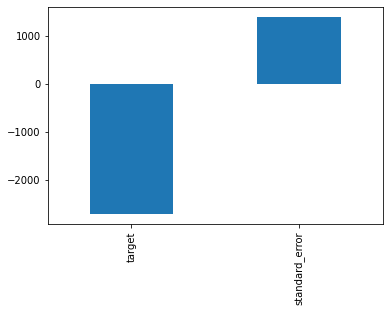

In [ ]:
df.sum(numeric_only = True).plot.bar()

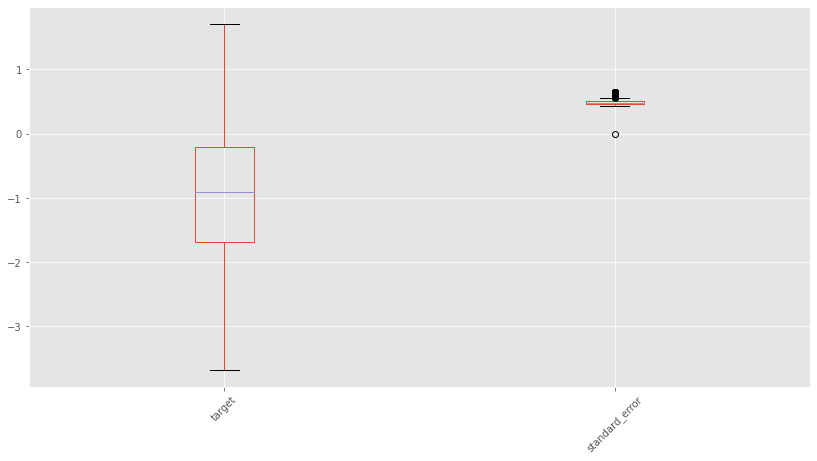

In [ ]:
# display boxplot of sale_dollars grouped by liquor_category
plt.style.use('ggplot')
ax = df.boxplot(column = ['target', 'standard_error'], figsize=(14,7))
plt.xticks(rotation=45)
ax

In [ ]:
duplicateRowsDF = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,id,url_legal,license,excerpt,target,standard_error


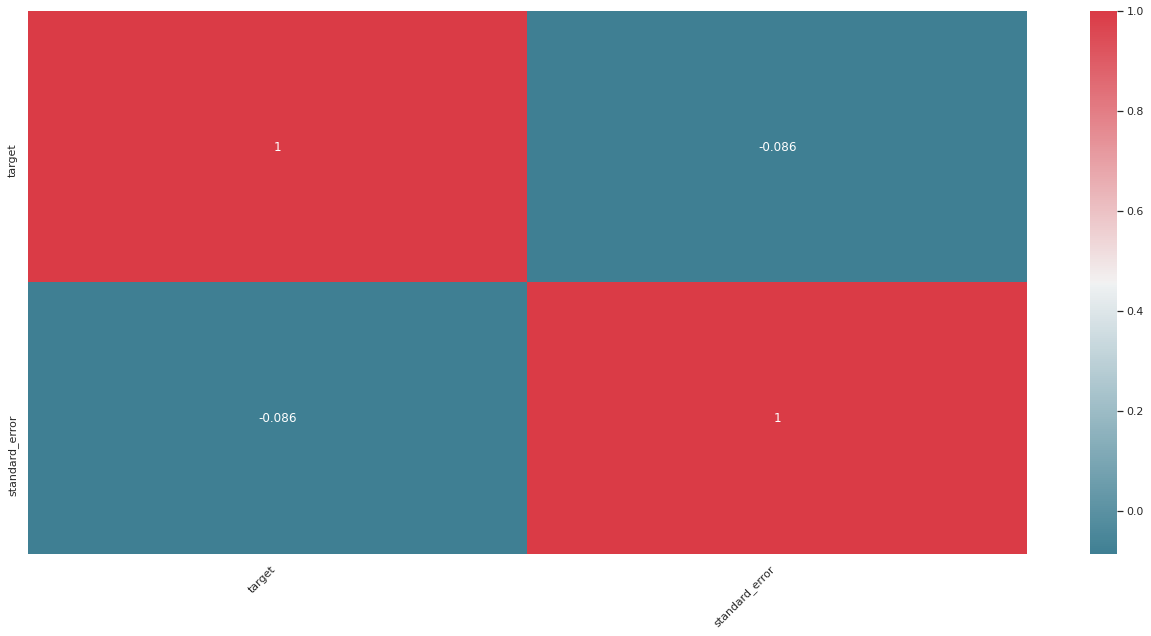

In [ ]:
# plot the correlation matrix using seaborn
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

# drop the counter attribute as that was used above when dealing with missing values
#del df['counter']

# show the heatmap
sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(18, 9))
chart=sns.heatmap(df.corr(), cmap=cmap, annot=True)
chart.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
f.tight_layout()

# Model Building

In [ ]:
!pip install transformers
https://www.kaggle.com/dagnelies/kiss-roberta

     |████████████████████████████████| 2.3MB 8.0MB/s 
     |████████████████████████████████| 901kB 47.4MB/s 
     |████████████████████████████████| 3.3MB 44.1MB/s 


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [ ]:
def get_data(df):
    # These 2 lines took me days to figure out!!! 😖😖😖
    tokenized = tokenizer(df['excerpt'].tolist(), padding=True, return_tensors="np") # the "np" means it will return numpy arrays
    return {feat: tokenized[feat] for feat in tokenizer.model_input_names}
    
X = get_data(df)
X

{'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'input_ids': array([[  101,  1332,  1103, ...,     0,     0,     0],
        [  101,  1398,  1194, ...,     0,     0,     0],
        [  101,  1249,  4271, ...,     0,     0,     0],
        ...,
        [  101,  1109,  1248, ...,     0,     0,     0],
        [  101, 20375,  1116, ...,     0,     0,     0],
        [  101, 16519,  1132, ...,     0,     0,     0]]),
 'token_type_ids': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}

In [ ]:
y = df[["target"]].values # note that this is a list of single value lists
y

array([[-0.34025912],
       [-0.31537234],
       [-0.58011797],
       ...,
       [ 0.25520938],
       [-0.21527918],
       [ 0.30077875]])

In [ ]:
import matplotlib.pyplot as plt

import keras
import tensorflow.keras.backend as K


early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=1,
    restore_best_weights=True,
)


# to define 'rmse' as loss instead of 'mse'
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def plot_hist(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    best_val_loss = min(history['val_loss'])
    print(f'Best validation loss: {best_val_loss:.3f}')

In [ ]:
BASE_MODEL = 'bert-base-cased'

In [ ]:
from transformers import TFAutoModelForSequenceClassification
from keras.optimizers import *

model = TFAutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=1) # num_labels=1 results in a regression

model.compile(optimizer=Adam(1e-5), loss=rmse, metrics=[keras.metrics.RootMeanSquaredError()]) # small training rates are necessary!
model.summary()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_189 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  769       
Total params: 108,311,041
Trainable params: 108,311,041
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1134/1134 - 236s - loss: 0.6410 - root_mean_squared_error: 0.8549 - val_loss: 0.5817 - val_root_mean_squared_error: 0.7263
Epoch 2/5
1134/1134 - 221s - loss: 0.4412 - root_mean_squared_error: 0.6707 - val_loss: 0.4691 - val_root_mean_squared_error: 0.6274
Epoch 3/5
1134/1134 - 221s - loss: 0.3562 - root_mean_squared_error: 0.5940 - val_loss: 0.5167 - val_root_mean_squared_error: 0.5704
Epoch 4/5
1134/1134 - 221s - loss: 0.2926 - root_mean_squared_error: 0.5495 - val_loss: 0.5231 - val_root_mean_squared_error: 0.5319
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping
Best validation loss: 0.469


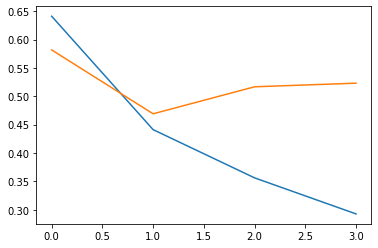

In [ ]:
hist = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=2, callbacks=[early_stop], verbose=2) # Mini-batches seem to overfit less

plot_hist(hist.history)

Take this model and merge it with other metrics like readability and sentence count etc. to train a new bert dense model.
* install py-readability-metrics
* Author for readability metrics package: https://www.linkedin.com/in/carmine/
* add a large amount of dropout
* large batch sizes
* gradient clipping

* Winning models will be sure to incorporate text cohesion and semantics.





In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


In [ ]:
hist.history['val_root_mean_squared_error']

[0.7262897491455078,
 0.6274312734603882,
 0.5703541040420532,
 0.5319066047668457]

In [ ]:
y_test = model.predict(X)

In [ ]:
y_test['logits']

array([[-0.31903338],
       [-0.41791958],
       [-0.50718474],
       ...,
       [-0.392349  ],
       [-1.7433761 ],
       [ 0.17728037]], dtype=float32)

In [ ]:
len(y_test['logits'])

2834

In [ ]:
y

array([[-0.34025912],
       [-0.31537234],
       [-0.58011797],
       ...,
       [ 0.25520938],
       [-0.21527918],
       [ 0.30077875]])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_test['logits'])

0.15266897890059206

# Readability Metrics


https://pypi.org/project/py-readability-metrics/


Dale–Chall readability formula
https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula  
Score	Notes  
4.9 or lower	easily understood by an average 4th-grade student or lower  
5.0–5.9	easily understood by an average 5th or 6th-grade student  
6.0–6.9	easily understood by an average 7th or 8th-grade student  
7.0–7.9	easily understood by an average 9th or 10th-grade student  
8.0–8.9	easily understood by an average 11th or 12th-grade student  
9.0–9.9	easily understood by an average 13th to 15th-grade (college) student


In [25]:
import pandas as pd
df = pd.read_csv(r"https://raw.githubusercontent.com/jjschueder/SMUCaptsoneA/main/train.csv")

In [2]:
test_doc = df.iloc[0,3]
print(test_doc)

When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.
The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.
At each end of the room, on the wall, hung a beautiful bear-skin rug.
These rugs were for prizes, one for the girls and one for the boys. And this was the game.
The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole. Each player was given a small flag which they were to plant on reaching the Pole.
This would have been an easy matter, but each traveller was obliged to wear snowshoes.


In [4]:
!pip install py-readability-metrics
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:

from readability import Readability
r = Readability(test_doc)
fk = r.flesch_kincaid()
print(fk.score)
print(fk.grade_level)

6.744474352463179
7


In [ ]:
# Other Metrics
# This doesn't generate output, look at example above
r.flesch_kincaid()
r.flesch()
r.gunning_fog()
r.coleman_liau()
r.dale_chall()
r.ari()
r.linsear_write()
#r.smog()
r.spache()

In [26]:
# apply Flesch-Kindcaid and Dale–Chall to dataframe
for index, row in df.iterrows():
    r = Readability(row['excerpt'])
    fk = r.flesch_kincaid()
    df.at[index, 'fkscore'] = fk.score
    df.at[index, 'fkgrade_level'] = fk.grade_level
    dc = r.dale_chall()
    df.at[index, 'dcscore'] = dc.score
    #df.at[index, 'dcgrade_level_low'] = dc.grade_levels[0]
    #df.at[index, 'dcgrade_level_high'] = dc.grade_levels[1]
df

,id,url_legal,license,excerpt,target,standard_error,fkscore,fkgrade_level,dcscore
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009,6.744474,7,6.560722
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805,5.230699,5,7.606702
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676,6.446818,6,8.108452
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007,12.343512,12,6.996429
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845,9.629619,10,1.995315
...,...,...,...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900,6.755073,7,7.295163
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648,5.837662,6,7.283374
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866,4.000878,4,6.425865
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128,6.457544,6,7.485096


## Document Statistics
I want to count basic feautres to potentially add as features in our models

In [ ]:
# I would use this to count sentences
import nltk
sents = nltk.sent_tokenize(test_doc)
print("Num Sents: ",len(sents))
sents

Num Sents:  11


['When the young people returned to the ballroom, it presented a decidedly changed appearance.',
 'Instead of an interior scene, it was a winter landscape.',
 'The floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field.',
 'The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow.',
 'Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.',
 'At each end of the room, on the wall, hung a beautiful bear-skin rug.',
 'These rugs were for prizes, one for the girls and one for the boys.',
 'And this was the game.',
 'The girls were gathered at one end of the room and the boys at the other, and one end was called the North Pole, and the other the South Pole.',
 'Each player was given a small flag which they were to plant on reaching the Pole.',
 'This would have been an easy matter, but each travel

In [ ]:
# Count Words and calc words per sentence
words = 0
for sent in sents:
  get_words = sent.split(" ")
  num_words = len(get_words)
  words += num_words

print("Words in doc: ", words)
print("Words per Sent: ", words/len(sents))

Words in doc:  179
Words per Sent:  16.272727272727273


# Archive

In [ ]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

In [ ]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
# loading text corpora
alice = gutenberg.raw(fileids='carroll-alice.txt')
sample_text = ("US unveils world's most powerful supercomputer, beats China. " 
               "The US has unveiled the world's most powerful supercomputer called 'Summit', " 
               "beating the previous record-holder China's Sunway TaihuLight. With a peak performance "
               "of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, "
               "which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, "
               "which reportedly take up the size of two tennis courts.")
sample_text

"US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts."

Sentence Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
default_st = nltk.sent_tokenize
alice_sentences = default_st(text=alice)
sample_sentences = default_st(text=sample_text)

In [ ]:
print('Total sentences in sample_text:', len(sample_sentences))
print('Sample text sentences :-')
print(np.array(sample_sentences))

print('\nTotal sentences in alice:', len(alice_sentences))
print('First 5 sentences in alice:-')
print(np.array(alice_sentences[0:5]))

Total sentences in sample_text: 4
Sample text sentences :-
["US unveils world's most powerful supercomputer, beats China."
 "The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight."
 'With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second.'
 'Summit has 4,608 servers, which reportedly take up the size of two tennis courts.']

Total sentences in alice: 1625
First 5 sentences in alice:-
["[Alice's Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I."
 "Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is the use of a book,' thought Alice 'without pictures or\nconversation?'"
 

In [ ]:
default_wt = nltk.word_tokenize
words = default_wt(sample_text)
np.array(words)

array(['US', 'unveils', 'world', "'s", 'most', 'powerful',
       'supercomputer', ',', 'beats', 'China', '.', 'The', 'US', 'has',
       'unveiled', 'the', 'world', "'s", 'most', 'powerful',
       'supercomputer', 'called', "'Summit", "'", ',', 'beating', 'the',
       'previous', 'record-holder', 'China', "'s", 'Sunway', 'TaihuLight',
       '.', 'With', 'a', 'peak', 'performance', 'of', '200,000',
       'trillion', 'calculations', 'per', 'second', ',', 'it', 'is',
       'over', 'twice', 'as', 'fast', 'as', 'Sunway', 'TaihuLight', ',',
       'which', 'is', 'capable', 'of', '93,000', 'trillion',
       'calculations', 'per', 'second', '.', 'Summit', 'has', '4,608',
       'servers', ',', 'which', 'reportedly', 'take', 'up', 'the', 'size',
       'of', 'two', 'tennis', 'courts', '.'], dtype='<U13')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [ ]:
from nltk.corpus import gutenberg
from string import punctuation
import re
bible = gutenberg.sents('bible-kjv.txt') 
remove_terms = punctuation + '0123456789'

norm_bible = [[word.lower() for word in sent if word not in remove_terms] for sent in bible]
norm_bible = [' '.join(tok_sent) for tok_sent in norm_bible]
norm_bible = filter(None, normalize_corpus(norm_bible))
norm_bible = [tok_sent for tok_sent in norm_bible if len(tok_sent.split()) > 2]

In [ ]:

from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

In [ ]:

from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

NameError: ignored